# Automatic Patent Classification

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use("classic")
sns.set()
from time import time

## Pre-processing...

### Importing data into pandas.DataFrame

In [30]:
### Importing data into pandas.DataFrame
# LOAD DATA DIRECTLY FROM .CSV INTO PYTHON_LIST()

X_title, X_resume, y = [], [], []
dataset = open('dataset_ipc_first.csv', 'r', encoding='latin-1')
header = dataset.readline()
if header[:-1] == 'title|resume|ipc':
    for line in dataset:
        line = line[:-1].split('|')
        if line[2][0:1] in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
            X_title.append(line[0])  # title
            X_resume.append(line[1]) # resume
            y.append(line[2][0:1])   # only first level IPC class (A..H)
print('Number of occurences on X: ', len(X_title))
print('Number of occurences on X: ', len(X_resume))
print('Number of occurences on y: ', len(y))

categories = pd.DataFrame(y, columns = ['ipc_level1'])

## LOAD DATA USING PANDAS
# corpora = pd.read_csv('dataset_ipc_first.csv', sep = '|', encoding = 'latin-1')
# create ipc_level1 column with IPC first level category
# categories = pd.DataFrame()
# categories['ipc_level1'] = corpora.apply(lambda row: row['ipc'][0:1], axis=1)


## REDUCE SAMPLE SIZE
# # reducing number of rows to 5000
# corpora = corpora[0:4999]
# categories = categories[0:4999]

Number of occurences on X:  347032
Number of occurences on X:  347032
Number of occurences on y:  347032


### Analyzing data

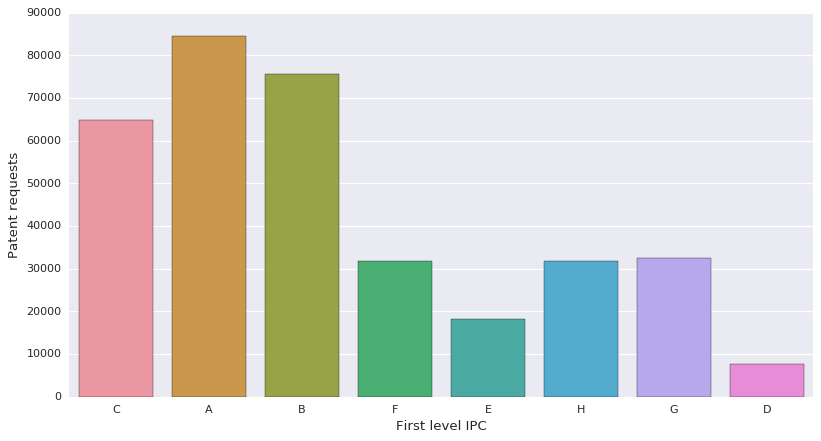

Total count of patent requests:  347032


In [31]:
### first look on data
plt.figure(figsize=(12,6))
ax = sns.countplot(x="ipc_level1", data=categories)
plt.ylabel('Patent requests', fontsize=12)
plt.xlabel('First level IPC', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()
print('Total count of patent requests: ', len(categories))

## Extracting features...

### Corpora vectorization

In [32]:
# Vectorization
from time import time
from sklearn.feature_extraction.text import CountVectorizer

print('Extracting features...')
vec = CountVectorizer(ngram_range = (1, 1), max_df = .95, min_df = 1)
t0 = time()
X_title_features = vec.fit_transform(X_title)
print('Title count matrix shape: ', X_title_features.shape)
X_resume_features = vec.fit_transform(X_resume)
print('Resume count matrix shape: ', X_resume_features.shape)
print('done in %0.3fs.' % (time() - t0))

Extracting features...
Title count matrix shape:  (347032, 64585)
Resume count matrix shape:  (347032, 254990)
done in 40.374s.


#### Reducing deminsionality

In [33]:
### Reducing deminsionality with SVD
from sklearn.decomposition import TruncatedSVD

print('Reducing dimensionality...')
svd = TruncatedSVD(n_components = 500)
t0 = time()
X_title_svd = svd.fit_transform(X_title_features)
print('Title most relevant features matrix shape: ', X_title_svd.shape)
X_resume_svd = svd.fit_transform(X_resume_features)
print('Resume most relevant features matrix shape: ', X_resume_svd.shape)
print('done in %0.3fs.' % (time() - t0))

Reducing dimensionality...
Title most relevant features matrix shape:  (347032, 500)
Resume most relevant features matrix shape:  (347032, 500)
done in 424.973s.


### Categories binarizer

In [35]:
from sklearn.preprocessing import LabelBinarizer
y_binarized = LabelBinarizer().fit_transform(y)
print(y_binarized)

[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
